# Tarea 2 ML

Ignacio loayza 201273604-8  
Camilo Perez 201273533-5


## I ) Tipos de Fronteras de Clasificación
Iniciamos el estudio generando el dataset a utilizar y seteando la semilla.

In [304]:
#encoding:UTF-8

# Uno de nosotros usa python 2 y el otro python 3
from __future__ import print_function, unicode_literals

# SpeedML para graficos bonitos
from speedml import Speedml

# estadistica
import pandas as pd

#pyplot
import matplotlib.pyplot as plt
%matplotlib inline

# numpy
import numpy as np

#Utilizaremos la semilla = "Ñanculef es mi pastor, nada me ha de  faltar"
seed = "Ñanculef es mi pastor, nada me ha de faltar"
seed = hash(seed)%2^32

## Utils
from sklearn.utils import check_random_state
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import accuracy_score
from ipywidgets import interactive
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC as SVM
from sklearn.neighbors import KNeighborsClassifier
from ipywidgets import interactive
from sklearn.linear_model import LogisticRegression as LR
from sklearn.decomposition import PCA, KernelPCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.model_selection import train_test_split
from pandas_ml import ConfusionMatrix
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA as KPCA

# Funciones utiles
"""
visualize_border puede hacer dos cosas, si no se le pasa un modelo permite
    visualizar la distirbución de los datos. Si se le pasa entrega el gráfico de
    distribucion de los datos junto con la frontera de clasificación del modelo.
"""
def visualize_border(x, y, title = "", model = None):
        fig = plt.figure(figsize=(12,6))
        plt.scatter(x[:,0], x[:,1], s = 50, c=y, cmap=plt.cm.winter)
        h = .02 #step size?
        x_min, x_max = x[:, 0].min() - 1, x[:, 0].max()+1
        y_min, y_max = x[:, 1].min() - 1, x[:, 1].max()+1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        
        if model is not None:
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contour(xx, yy, Z, cmap = plt.cm.Paired)
        
        plt.title(title)
        plt.show()

        
"""
visualize_border_interactive grafica la frontera de decisión utilizando visualize_border,
adicionando la opción de ingresar un parámetro
"""
def visualize_border_interactive(param, learner, **kwargs):
    model = train_model(param, model = learner, **kwargs)
    visualize_border(X,y,model = model)
    y_pred = model.predict(X)
    y_true = y
    print("Precisión del modelo: ", accuracy_score(y_true,y_pred))
    print("Miss classification error: %f"%(1-accuracy_score(y_true,y_pred)))

def train_model(param, model = "LR", **kwargs):
    if(model == "LR"):
        model = LR()
        try:
            penalty = kwargs["penalty"]
        except KeyError:
            penalty = "l1"
        model.set_params(C = param, penalty = pen)

    elif(model == "SVM"):
        model = SVM()
        try:
            kernel = kwargs["krnl"]
        except KeyError:
            kernel = "linear"
        model.set_params(C = param, kernel = kernel)

    elif(model == 'KNN'):
        model = KNeighborsClassifier()
        try:
            neighbors = kwargs["neighbors"]
        except KeyError:
            neighbors = 5
        model.set_params(n_neighbors = neighbors)
    elif(model == 'logistic'):
        model = LR()
        try:
            penalty = kwargs['penalty']
        except KeyError:
            penalty = 'l2'
        model.set_params(C = param, penalty = penalty)
        
    model.fit(X,y)
    return model

In [116]:
#Generamos el dataset a utilizar
n_samples = 500
mean = (0,-4)
C = np.array([[0.3,0.1],[0.1,1.5]])
datos1 = np.random.multivariate_normal(mean,C,n_samples)
outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples))*3
outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples))*3
datos2 = np.vstack((outer_circ_x, outer_circ_y)).T

generator = check_random_state(seed)
datos2 += generator.normal(scale=0.3,size = datos2.shape)


> ### Análisis exploratorio de Datos

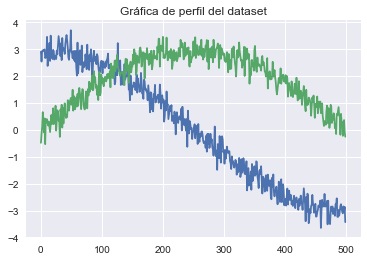

In [117]:
plt.plot(datos2)
plt.title("Gráfica de perfil del dataset")
plt.show()

> a) Construimos el dataset común con los dos conjuntos generados, posteriormente realizamos el shift de algunos valores de un conjunto al otro, con le fin de hacer menos trivial el ejercicio.

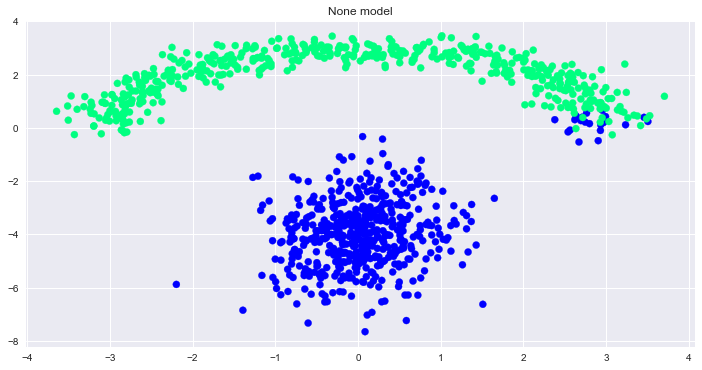

In [118]:
X = np.concatenate((datos1,datos2), axis = 0)
n = 20 #ruido?
y1 = np.zeros(datos1.shape[0]+n)
y2 = np.ones(datos2.shape[0]-n)
y = np.concatenate((y1,y2),axis = 0)
visualize_border(X,y,"None model")

> b) Entrenamos LDA y visualizamos la frontera de decisión:

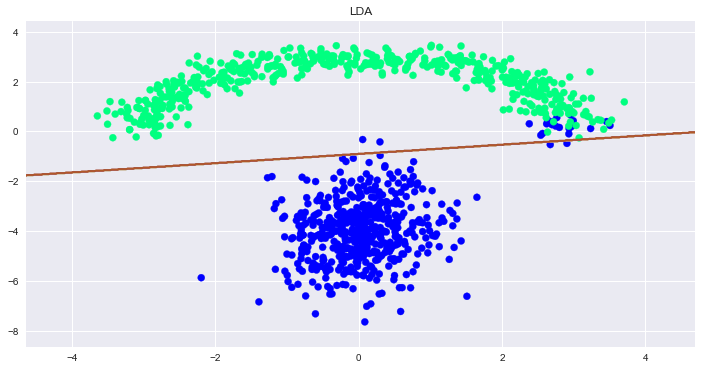

In [119]:
lda_model = LDA()
lda_model.fit(X,y)
visualize_border(X,y,title = "LDA",model = lda_model)

Observamos que LDA encuentra una frontera aceptable, teniendo en cuenta ciertos fallos de clasificación (cercanos al punto (0,-2)) que parecen ser inevitables debido a la naturaleza de los datos

> c) Entrenamos ahora utilizando QDA

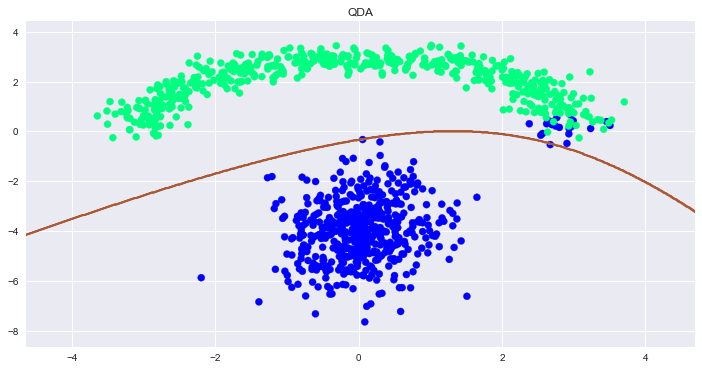

In [120]:
qda_model = QDA()
qda_model.fit(X,y)
visualize_border(X,y, title = "QDA", model = qda_model)

> c) La frontera que implementa QDA soluciona el error de clasificación que se presentaba en los puntos cercanos a (0,-2) en LDA, sin embargo, aún se hace presente el error de clasificación de los valores afectados por el ruido en el cuadrante (2:4,0:2).  
> Podemos explicar el rendimiento de QDA versus LDA recordando los discriminadores probabilísticos implementados en cada método:
>> * LDA para dos clases: Implementa un discriminador probabilístico condicional, asumiendo que las funciones de probabilidad marginal son distribuidas bajo una normal con media y covarianza $(\mu_0,\sum_0)$ y $(\mu_1,\sum_1)$ para las clases. La solución al problema de clasificación mediante LDA entonces, se basa en la evaluación de la función de verosimilitud y aplicando un umbral de decisión.
>> * QDA: Similar a LDA, este clasificador asume normalidad, sin embargo, QDA no asume que la covarianza de cada clase es igual (a diferencia de LDA). De igual forma que en LDA, en QDA la decisión de clasificación se basa en el análisis de la tasa de verosimilitud. En QDA se asume una solución cuadrática en las mediciones, es decir:
$$x^TAx + b^Tx + C$$

> d) Comparamos el rendimiento de QDA y LDA mediante el error de clasificación.

In [121]:
y_pred_qda = qda_model.predict(X)
y_true = y

y_pred_lda = lda_model.predict(X)

print("Miss Classification loss for QDA: %f"%(1-accuracy_score(y_true, y_pred_qda)))
print("Miss Classification loss for LDA: %f"%(1-accuracy_score(y_true, y_pred_lda)))

Miss Classification loss for QDA: 0.019000
Miss Classification loss for LDA: 0.020000


> LDA presenta mayor error que QDA, lo que se esperaba que sucediese, pues LDA no logra evitar el error de clasificación en el sector cercano a (0,-2) mencionado anteriormente, QDA si. Por otro lado el error de clasificación obtenido para QDA tiene sentido pues los datos incorrectamente clasificados corresponden a los datos a los que se les agrego ruido (20 datos), correspondiendo al 2% de los datos generados, esto se cumple de forma análoga para LDA si tomamos en cuenta los datos cercanos al punto conflictivo mencionado.

> e), f) y g) Construimos un gráfico interactivo donde modificamos el valor de penalización para la norma l2

In [122]:
# definimos el rango de valores de penalización
p_min = 0.01
p_max = 10.0
learners = {'SVM': 'SVM', 'Regresión Logistica': 'LR'}
kernels = {'lineal':'linear', 'rbf':'rbf', 'polinomial':'poly', 'sigmoid':'sigmoid'}
interactive(visualize_border_interactive, param = (p_min,p_max), learner = learners, krnl = kernels)

> Podemos observar que la frontera de clasificación tiene poca variación en su pendiente frente a diferentes valores del parámetro de regularización. El mejor resultado obtenido por inspección se registra para un clasificador basando en SVM, con kerneldel tipo 'rbf' y parámetro de regularización de 1.71, obteniendose 0.009 error de clasificación.

> h) Contruimos ahora un clasificador del tipo Decision Tree.<br>
Antes de comenzar a contruir el modelo vale la pena comentar un poco las características del modelo en cuestión, debido a que es un método no paramétrico, tiene tendencia al sobreajuste, en particular se da el caso de que para una alta dimensionalidad (en comparación con el tamaño muestral), los árboles de desición se sobreajustan. Es por lo anterior que antes de construir el modelo, utilizaremos PCA para reducir dimensionaldiad.

In [123]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 64)
tree_clf = tree.DecisionTreeClassifier(criterion = 'entropy',
                        max_depth = 3)
tree_clf = tree_clf.fit(x_train,y_train)

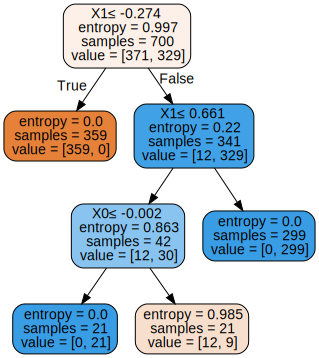

In [124]:
# OBS: Ejecutar esta celda requiere tener instalado graphviz

import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file = None)
graph = graphviz.Source(dot_data)
graph.render("Wave")
dot_data = tree.export_graphviz(tree_clf, out_file=None,   
                         filled=True, rounded=True,  
                         special_characters=True,)  
graph = graphviz.Source(dot_data)
graph

In [125]:
print("Número de clases detectadas: ",tree_clf.n_classes_)
print("Número de atributos: ",tree_clf.n_features_)
print("Precisión del modelo: ",tree_clf.score(x_test,y_test).round(3))


y_pred = tree_clf.predict(x_test)
cm = np.matrix(ConfusionMatrix(y_test,y_pred))
cm

Número de clases detectadas:  2
Número de atributos:  2
Precisión del modelo:  0.98


matrix([[ Predicted  0.0  1.0  __all__
 Actual                      
 0.0        149    0      149
 1.0          6  145      151
 __all__    155  145      300]], dtype=object)

i) k-NN

In [133]:
interactive(visualize_border_interactive, param = (p_min,p_max), learner = 'KNN', neighbors = (1,9))


## Análisis de datos de audio

In [165]:
from scipy.io import wavfile
def clean_filename(fname, string):
    file_name = fname.split('/')[1]
    if file_name[:2] == '__':
        file_name = string + file_name
    return file_name
SAMPLE_RATE = 44100
def load_wav_file(name, path):
    s, b = wavfile.read(path + name)
    assert s == SAMPLE_RATE
    return b

In [152]:
df = pd.read_csv('./heartbeat-sounds/set_a.csv')
set_df = set(df['label'])
set_array = list(set_df)
len(set_array)

5

b) Transformamos los archivos *.wav* a secuencias de tiempo

In [166]:
def padd_zeros(array,length):
    aux = np.zeros(length)
    aux[:array.shape[0]] = array
    return aux
new_df = pd.DataFrame({'file_name' : df['fname'].apply(clean_filename,string='Aunlabelledtest')})
new_df['time_series'] = new_df['file_name'].apply(load_wav_file, path='./heartbeat-sounds/set_a/')
new_df['len_series'] = new_df['time_series'].apply(len)
new_df['time_series']=new_df['time_series'].apply(padd_zeros,length=max(new_df['len_series']))

c) Al parecer los datos se encuentran incorrectamente etiquetados, así es espeficado por Pter Grenholm, quien con su background medico analizó los datos y se dió cuenta de la inconsistencia (https://www.kaggle.com/toregil/new-labels-for-set-a).

In [170]:
new_labels=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,1,1,1,1,1,
 1,1,1,1,1,2,1,1,1,2,2,2,1,1,2,1,2,2,1,2,2,2,2,2,2,
 2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,
 1,2,1,1,1,1,1,2,1,1,1,1,1,1,1,2,2,1,1,1,1,1,2,1,0,
 2,2,1,1,1,1,1,0,1,0,1,1,1,2,1,0,1,1,1,1,1,2,0,0,0,
 0,0,0,0,1,0,0,0,0,0,0,1,0,2,1,2,2,2,2,2,2,2,2,2,2, 2]
labels = ['artifact','normal/extrahls', 'murmur']
new_df['target'] = [labels[i] for i in new_labels]

In [183]:
new_df.head()

,file_name,time_series,len_series,target
0,artifact__201012172012.wav,"[1.0, -3.0, -1.0, -7.0, -9.0, -2.0, -6.0, -5.0...",396900,artifact
1,artifact__201105040918.wav,"[-2.0, 3.0, -4.0, 4.0, -3.0, 2.0, -1.0, 0.0, 0...",396900,artifact
2,artifact__201105041959.wav,"[6.0, -4.0, -9.0, -1.0, -4.0, 1.0, -5.0, 2.0, ...",396900,artifact
3,artifact__201105051017.wav,"[-85.0, -198.0, -214.0, -173.0, -177.0, -206.0...",396900,artifact
4,artifact__201105060108.wav,"[53.0, -35.0, 47.0, 170.0, 340.0, 436.0, 535.0...",396900,artifact


Este proceso es necesario y útil en la investigación que estamos realizando porque tener datos mal etiquetados significa entrenar nuestros modelos con valores ruidosos, disminuyendo el poder predictivo del mismo y haciendolo propenso a fallar frente a nuevos datos. Es importante también hacer notar lo valioso de tener una opinión de un agente experto en el dominio del dataset, que nos permita corregir y verificar información.

d) Ahora, codificamos las clases como valores numéricos, este paso es vital para poder ejecutar modelos de aprendizaje sobre los datos, de no hacer las transformaciones correspondientes podriamos estar alimentando los modelos con basura.

In [184]:
new_df["target"] = new_df["target"].astype('category')
cat_columns = new_df.select_dtypes(['category']).columns
new_df[cat_columns] = new_df[cat_columns].apply(lambda x: x.cat.codes)

e) Se desordenan los datos y se convierten en el formato a trabajar, de forma que cada dato sea una secuencia de amplitudes, y que eso sea lo único que vea el algoritmo.

In [185]:
new_df = new_df.sample(frac=1,random_state=44)
X = np.stack(new_df['time_series'].values, axis=0)
y = new_df.target.values
X.shape

(176, 396900)

Existe un problema al observar la dimensión de esta matriz. Las columnas representan atributos desde el punto de vista de los algoritmos clasificadores. Por lo tanto, con 396900 atributos, los algoritmos se enfrentarán a un problema muy costoso de resolver, afectado enormemente por la "maldición de la dimensionalidad". Por lo tanto, se requiere algún tipo de preprocesamiento para poder resolver el problema y encontrar un modelo antes de que salgamos de la carrera.

f) Primero, se convierten tiempos a frecuencias mediante una transformada de Fourier discreta.

In [186]:
X_fourier = np.abs(np.fft.fft(X))

g) Luego, se aplica una técnica de muestreo de señales de audio.

In [187]:
from scipy import signal
X_resampled = []
for i in range(X_fourier.shape[0]):
    sequence = X_fourier[i,:].copy()
    resampled_sequence = signal.resample(sequence, 100000)
    X_resampled.append(resampled_sequence)
X_resampled = np.array(X_resampled)
X_resampled.shape

(176, 100000)

Con esto hemos logrado reducir las dimensiones del problema de 396900 a 100000, que es bastante más manejable. Podemos asegurar que el muestreo es representativo dada la naturaleza periódica de las funciones resultantes de las transformadas de Fourier.

h) Ahora, con los datos listos para empezar a ser trabajados, separaremos los conjuntos de entrenamiento y de pruebas.

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y, test_size=0.25, random_state=42)
print("Clases en conjunto de entrenamiento:", len(set(y_train)))
print("Clases en conjunto de pruebas:", len(set(y_test)))
print("Entradas en conjunto de entrenamiento:", X_train.shape[0])
print("Entradas en conjunto de pruebas:", X_test.shape[0])

Clases en conjunto de entrenamiento: 3
Clases en conjunto de pruebas: 3
Entradas en conjunto de entrenamiento: 132
Entradas en conjunto de pruebas: 44


En retrospectiva, tiene mucho sentido que la cantidad de clases no varíe al separar los datos en conjuntos de entrenamiento y pruebas (recordar que se cambiaron las etiquetas por sugerencia del experto en el área). Y que se separen en cantidades que siguen la tasa que se le entregó a `train_test_split`.

i) Ahora procedemos a estandarizar los datos, restando la media y dividiendo por la desviación estándar

In [205]:
std = StandardScaler(with_mean=True, with_std=True)
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

j) Realizamos un análisis de las componentes principales con el fin de reducir dimensionalidad, utilizaremos un kernel sinusoidal debido a la naturaleza de los datos, los cuales fueron tratados con una transformada de Fourier.

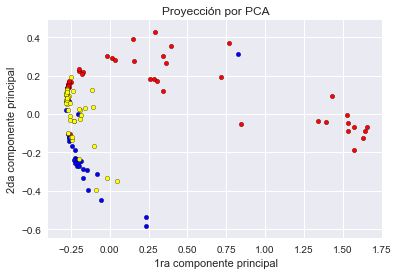

In [295]:
d = 2
pca_model = KPCA(n_components=d, kernel = 'cosine')
pca_model.fit(X_train)
X_pca_train = pca_model.transform(X_train)
X_pca_test = pca_model.transform(X_test)

class0 = np.array([x[0] for x in zip(X_pca_train, y_train) if x[1] == 0])
class1 = np.array([x[0] for x in zip(X_pca_train, y_train) if x[1] == 1])
class2 = np.array([x[0] for x in zip(X_pca_train, y_train) if x[1] == 2])

plt.scatter(class0[:,0], class0[:,1], c="red",s=20, edgecolor='k')
plt.scatter(class1[:,0], class1[:,1], c="blue",s=20, edgecolor='k')
plt.scatter(class2[:,0], class2[:,1], c="yellow",s=20, edgecolor='k')


plt.title("Proyección por PCA")
plt.xlabel("1ra componente principal")
plt.ylabel("2da componente principal")

In [ ]:
p_min = 0
p_max = 15
penalty = {'l1':'l1','l2':'l2'}
interactive(visualize_border_interactive, param = (p_min,p_max),penalty = penalty, learner = 'logistic')